In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers , optimizers 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('E:\\Kaggle datasets\\ConcreteProblem.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

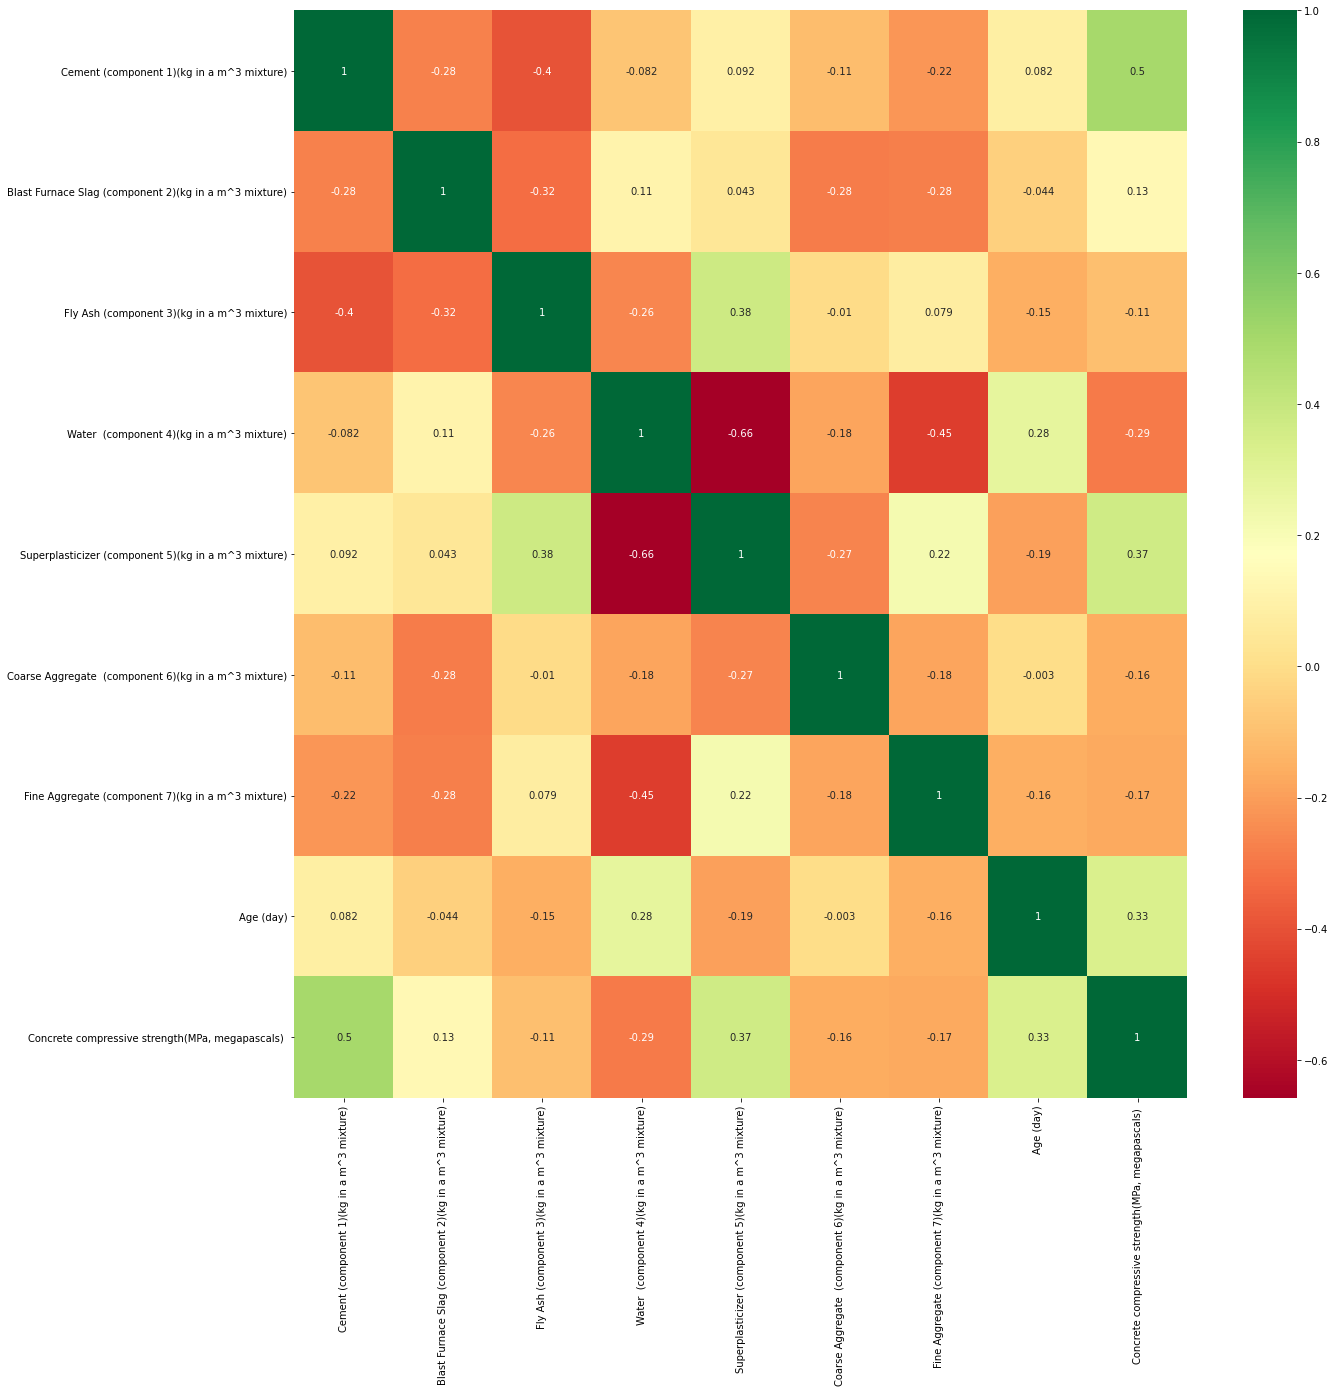

In [6]:
import seaborn
corelation = data.corr()
top_corelated_features = corelation.index
plt.figure(figsize=(20,20))
graph = seaborn.heatmap(data[top_corelated_features].corr(),annot=True, cmap="RdYlGn")

In [15]:
x = (data.loc[:, data.columns!='Concrete compressive strength(MPa, megapascals) '])
y = (data.loc[:,data.columns=='Concrete compressive strength(MPa, megapascals) '])

In [16]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
print(data['Concrete compressive strength(MPa, megapascals) '])

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64


In [17]:
y

,"Concrete compressive strength(MPa, megapascals)"
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [19]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [20]:
y_train

,"Concrete compressive strength(MPa, megapascals)"
995,27.68
507,62.05
334,23.80
848,33.40
294,7.40
...,...
87,24.40
330,42.22
466,33.56
121,68.30


In [21]:
x_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [22]:
y_test

,"Concrete compressive strength(MPa, megapascals)"
31,52.91
109,55.90
136,74.50
88,35.30
918,10.54
...,...
482,56.14
545,18.75
110,38.00
514,74.36


In [32]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30)

In [34]:
x_train.shape

(576, 8)

In [37]:
x_val.shape

(248, 8)

In [38]:
x_test.shape

(206, 8)

In [23]:
mean = x_train.mean(axis=0)
x_train -= mean

std = x_train.std(axis=0)

x_train /= std
x_test -= mean
x_test /= std

In [39]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
202,-0.861669,-0.855064,1.128726,-0.923796,0.274170,1.479789,0.393810,0.187490
915,-1.193650,1.260418,1.403723,0.572318,0.475268,-1.188754,-0.902731,-0.275506
643,0.619690,-0.855064,-0.830629,0.197117,-1.032963,0.971495,-0.026022,-0.622753
248,-0.420888,-0.855064,0.639669,0.229947,0.140105,-0.300510,0.924774,0.915055
897,0.005944,0.524598,-0.830629,-0.647085,0.140105,-0.045093,0.270330,-0.275506
...,...,...,...,...,...,...,...,...
499,1.930874,-0.556137,1.091226,1.322720,-0.379396,-1.163339,-0.902731,-0.275506
470,-0.297209,-0.855064,1.017790,0.520728,-0.060992,0.890168,-0.219886,0.915055
489,0.963759,-0.625121,0.638106,-1.162987,1.296415,-0.451728,0.900078,-0.688895
286,-0.948151,-0.855064,1.778720,-0.572045,0.240654,1.042656,0.070292,-0.275506


In [44]:
from tensorflow.keras import models, layers, optimizers
def building_model():
    model = models.Sequential()
    model.add(tf.keras.layers.Dense(10 , activation='relu' , input_shape=(8,)))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(6,activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mse', metrics='mae')
    return model

In [45]:
model=building_model()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=20 ,epochs=100, verbose=0)

In [46]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)

In [50]:
print(train_loss[-1])

56.215248107910156


In [51]:
print(val_loss[-1])

57.74013900756836


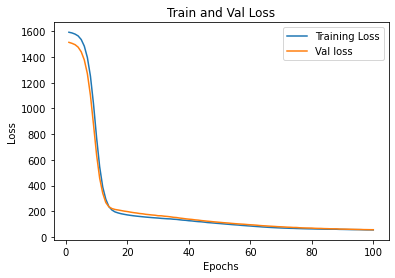

In [52]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
mae_train = history.history['mae']
mae_val= history.history['val_mae']

In [54]:
print('Training Loss: ' + str(mae_train[-1]))

Training Loss: 5.72685432434082


In [55]:
print('Validation Loss' + str(mae_val[-1]))

Validation Loss5.885545253753662


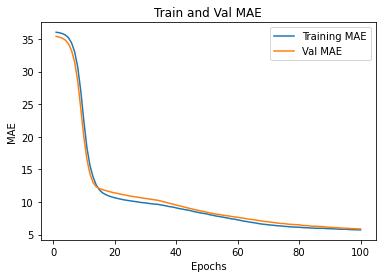

In [56]:
plt.plot(epochs, mae_train, label='Training MAE')
plt.plot(epochs, mae_val, label='Val MAE')
plt.title('Train and Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [57]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 55.5064 - mae: 5.9444


[55.506446838378906, 5.9444499015808105]

In [58]:
model.predict(x_test)

array([[47.38166  ],
       [44.51615  ],
       [66.874825 ],
       [42.22656  ],
       [22.427576 ],
       [38.611336 ],
       [21.528885 ],
       [56.18192  ],
       [30.911964 ],
       [40.595608 ],
       [30.458183 ],
       [11.00978  ],
       [63.56447  ],
       [44.434143 ],
       [21.204344 ],
       [34.871456 ],
       [31.97837  ],
       [18.03431  ],
       [30.911919 ],
       [21.84956  ],
       [36.840847 ],
       [46.257164 ],
       [42.936935 ],
       [14.649293 ],
       [25.064247 ],
       [34.65029  ],
       [13.3320675],
       [40.003677 ],
       [55.829285 ],
       [16.724684 ],
       [44.0897   ],
       [38.27341  ],
       [56.93936  ],
       [62.731583 ],
       [16.341965 ],
       [39.290127 ],
       [30.660456 ],
       [36.870102 ],
       [11.953841 ],
       [46.149788 ],
       [16.429703 ],
       [ 8.007952 ],
       [36.306873 ],
       [51.26364  ],
       [10.719801 ],
       [66.83798  ],
       [51.297684 ],
       [42.40